<a href="https://colab.research.google.com/github/ahmadryan/MLTSA_RQudsi/blob/master/HW4_RQudsi/chchchchanges_instructions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

TensorFlow 2.x selected.
Found GPU at: /device:GPU:0


In [3]:
!pip install ruptures
import ruptures as rpt
import pylab as pl
import pandas as pd
from numpy import *
%pylab inline

  Created wheel for ruptures: filename=ruptures-1.0.3-cp36-none-any.whl size=55251 sha256=bacdecd6a2787ce485252b4a72b173a7e063932be2893399ab219fb42a2d213a
  Stored in directory: /root/.cache/pip/wheels/8b/a2/15/6e7b600d1415d6d3e746e3004dc23eef3bf7778d35e6afebac
Successfully built ruptures
Populating the interactive namespace from numpy and matplotlib


In [4]:
! sudo apt-get install texlive-latex-recommended
! sudo apt install texlive-latex-extra
! sudo apt install dvipng

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  fonts-droid-fallback fonts-lmodern fonts-noto-mono libcupsfilters1
  libcupsimage2 libgs9 libgs9-common libijs-0.35 libjbig2dec0 libkpathsea6
  libpotrace0 libptexenc1 libsynctex1 libtexlua52 libtexluajit2 libzzip-0-13
  lmodern poppler-data t1utils tex-common texlive-base texlive-binaries
  texlive-latex-base
Suggested packages:
  fonts-noto poppler-utils ghostscript fonts-japanese-mincho
  | fonts-ipafont-mincho fonts-japanese-gothic | fonts-ipafont-gothic
  fonts-arphic-ukai fonts-arphic-uming fonts-nanum debhelper gv
  | postscript-viewer perl-tk xpdf-reader | pdf-viewer texlive-latex-base-doc
  texlive-latex-recommended-doc texlive-pstricks
The following NEW packages will be installed:
  fonts-droid-fallback fonts-lmodern fonts-noto-mono libcupsfilters1
  libcupsimage2 libgs9 libgs9-common libijs-0.35 libjbig2dec0 libkpathsea6
  lib

In [0]:
# Set the fontstyle to Times New Roman

font = { 'family' : 'Times New Roman', 'weight' : 'normal', 'size' : 10 }
plt.rc( 'font', **font )
plt.rc('text', usetex=True)

# Synthetic data
the cell below creates a synthetic dataset _(x,y)_ of 200 points, generated by two processes $ y =c + \epsilon$ with $\epsilon \sim N(0,1)$ (Gaussian stationary processes) that generate 100 points each with means 20 and 25 respectively.

findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


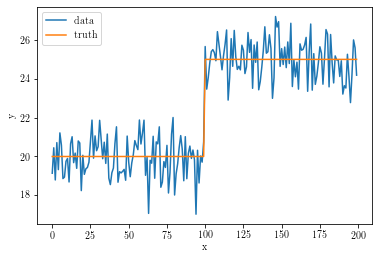

In [6]:
mu1, mu2 = 20, 25
x = np.arange(200)
ym = np.concatenate([np.random.randn(100) + mu1, np.random.randn(100) + mu2])
pl.plot(x, ym, label="data") 
pl.plot(range(200), [mu1] * 100 + [mu2] * 100, label="truth")
pl.xlabel("x")
pl.ylabel("y")
pl.legend();

# Single POC -  difference of means
write a function that finds the POC by assuming a single POC and maximizing the differencem in the means before and after the POC as described in
https://slides.com/federicabianco/mltsa4#/6/1
test it on the synthetic dataset _(x,y)_

In [7]:
def maxdiff(y):
    """calculates the POC as the points that maximized the difference between the mean before and the mean after the POC
    y: vector of endogenouos variables
    
    """
    N = len(y)
    f = np.nanmean
    poc, diff, before, after = 0, 0, np.nan, np.nan
    for i in range(1, N):
        diff_here = np.abs(f(ym[i:]) -  f(ym[:i]))
        if diff < diff_here:
            diff = diff_here
            poc = i
            before, after = f(ym[:i]), f(ym[i:])
    return(poc, before, after)

print("poc: {:.2f}, mean before: {:.2f}, mean after: {:.2f}".format(*maxdiff(ym)))


poc: 100.00, mean before: 19.93, mean after: 25.01


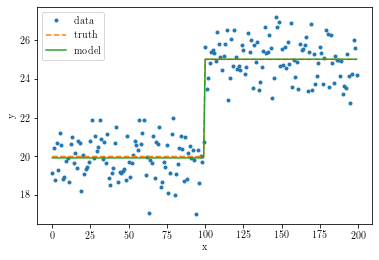

In [8]:
poc, before, after = maxdiff(ym)   
pl.plot(x, ym, '.', label="data")
pl.plot(range(200), [mu1] * 100 + [mu2] * 100, '--', label="truth")
pl.plot(x, [before] * poc + [after] * (len(ym) - poc), label="model")
pl.xlabel('x')
pl.ylabel('y');
pl.legend();

caption

# Single POC - MSE
write a function that finds the POC by minimizing the square error (see slide https://slides.com/federicabianco/mltsa4#/6/2) a single POC and maximizing the differencem in the means before and after the POC. like before return the index of the POC, the mean before and the mean after the POC.
Plot the data, the model, the truth, like in the step above.


Remember to write a docstring for the function https://www.python.org/dev/peps/pep-0257/!

In [9]:
def poc_mse(y):

    N = len(y)
    f = np.nanmean
    poc, diff, before, after = 0, 0, np.nan, np.nan
    error = np.nansum(np.sqrt((y[:] - f(ym[:] ))**2))
    for i in range(1, N):
        #print(poc, before, after, error)
        #print(i)
        error_here1 = np.nansum(np.sqrt((y[:i] - f(ym[:i] ))**2))
        error_here2 = np.nansum(np.sqrt((y[i:] - f(ym[i:] ))**2 ))
        error_here = np.nansum( [error_here1, error_here2] )

        diff_here = np.abs(f(ym[i:]) -  f(ym[:i]))

        if( (error_here < error) and ( diff_here > diff )):

            error = error_here
            diff = diff_here

            #if (diff > diff_here ):
            #    diff = diff_here
            poc = i
            before, after = f(ym[:i]), f(ym[i:])
        else :
            continue
    return poc, before, after, error

print("poc: {:.2f}, mean before: {:.2f}, mean after: {:.2f}, error is: {:.2f}".format(*poc_mse(ym)))

poc: 100.00, mean before: 19.93, mean after: 25.01, error is: 169.61


In [10]:
print("poc: {:.2f}, mean before: {:.2f}, mean after: {:.2f}, error is: {:.2f}".format(*poc_mse(ym)))

poc: 100.00, mean before: 19.93, mean after: 25.01, error is: 169.61


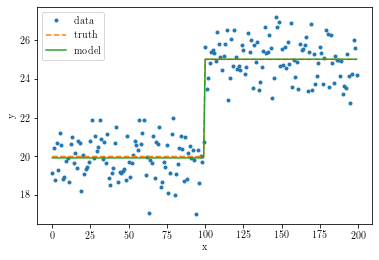

In [11]:
poc, before, after, error = poc_mse(ym)   
pl.plot(x, ym, '.', label="data")
pl.plot(range(200), [mu1] * 100 + [mu2] * 100, '--', label="truth")
pl.plot(x, [before] * poc + [after] * (len(ym) - poc), label="model")
pl.xlabel('x')
pl.ylabel('y');
pl.legend();

caption

# Single POC - diff of variance
Generate a new synthetic dataset _(x,ys)_ of 200 points, generated by two processes $ y =c + \epsilon$ with $\epsilon \sim N(\sigma,1)$ (Gaussian stationary processes) that generate 100 points each with means 20 and variance 1 and 4 respectively.

Modify the ```maxdiff()``` function so that it take an optional parameter sigma which allows you to use the function to choose the POC that maximizes the difference in standard deviation, instead of in mean. An optional argument is an argument that is set to a default in the function call. The default behavior of the function shoudl still be to calculate the POC as the point that maximized the before and after difference in the _mean_.


In [0]:
mu1, mu2 = 20, 25
s1, s2 = 1, 4
ys1 = mu1 + np.random.randn(100)*s1
ys2 = mu1 + np.random.randn(100)*s2
ys = np.concatenate((ys1, ys2))

In [13]:
def maxval(y, sigma=False):
    """calculates the POC as the points that maximized the difference between 
                the mean or variance before and the mean after the POC
    y: vector of endogenouos variables 
    sigma: finds the POC that maximizes the difference between before/after POC variance 
                (optional, default is before/after mean)
    """
    N = len(y)

    if(sigma):
        f = np.nanstd
    else:
        f = np.nanmean

    poc, diff, before, after = 0, 0, np.nan, np.nan

    for i in range(1, N):

        diff_here = np.abs(f(y[i:]) -  f(y[:i]))

        if diff < diff_here:
            diff = diff_here
            poc = i
            before, after = f(y[:i]), f(y[i:])

    return(poc, before, after)

print("poc: {:.2f}, standard deviation before: {:.2f}, standard deviation after: {:.2f}".format(*maxval(ys, 
                                                                    sigma=True)))

poc: 103.00, standard deviation before: 1.01, standard deviation after: 4.23


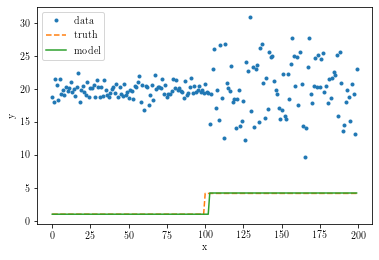

In [14]:
poc, before, after = maxval(ys, sigma=True)
pl.plot(x, ys, '.', label="data")
pl.plot(range(200), [np.std(ys1)] * 100 + [np.std(ys2)] * 100, '--', label="truth")
pl.plot(x, [before] * poc + [after] * (len(ym) - poc), label="model")
pl.xlabel('x')
pl.ylabel('y');
pl.legend();

# Find POC with rupture python package.
install and import the rupture package.
Find the POC in each synthetic time series.
Use the Pelt method. Reflect on the parameters that should be passed to the predict() function. Read the manual and feel free to ask questions on slack.

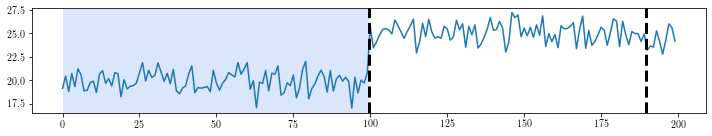

In [15]:
# detection
algo = rpt.Pelt(model='l1').fit(ym)
result = algo.predict(pen=3)

# display
rpt.display(ym, [100], result)
pl.show()

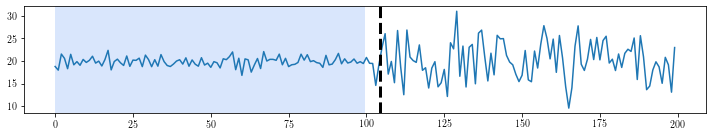

In [16]:
# detection
algo = rpt.Pelt(model='rbf').fit(ys)
result = algo.predict(pen=3)

# display
rpt.display(ys, [100], result)
pl.show()

In [0]:
rpt.Pelt?

# read in the data from LANL earthquake prediction 
I saved in the github repo as "http://fbb.space/mltsa/LALNeq.csv. This is a large file and will take a long time to read in. It is 1/100th of the original file. See how nice I am!?! https://www.kaggle.com/c/LANL-Earthquake-Prediction/data

Visualize and use the method DataFrame.describe() to extract some basic statistics of the dataset

In [18]:
eq1 = pd.read_csv('http://fbb.space/mltsa/LALNeq.csv')
eq1.describe()

,Unnamed: 0,acoustic_data,time_to_failure
count,4.500000e+06,4.500000e+06,4.500000e+06
mean,2.250000e+06,4.616407e+00,8.852012e-01
std,1.299038e+06,2.614006e+01,3.374432e-01
min,0.000000e+00,-4.621000e+03,3.008971e-01
25%,1.125000e+06,2.000000e+00,5.934956e-01
50%,2.250000e+06,5.000000e+00,8.849986e-01
75%,3.374999e+06,7.000000e+00,1.177597e+00
max,4.499999e+06,3.252000e+03,1.469100e+00


In [19]:
eq1.head()

,Unnamed: 0,acoustic_data,time_to_failure
0,0,12,1.4691
1,1,6,1.4691
2,2,8,1.4691
3,3,5,1.4691
4,4,8,1.4691


In [20]:
eq1.describe()

,Unnamed: 0,acoustic_data,time_to_failure
count,4.500000e+06,4.500000e+06,4.500000e+06
mean,2.250000e+06,4.616407e+00,8.852012e-01
std,1.299038e+06,2.614006e+01,3.374432e-01
min,0.000000e+00,-4.621000e+03,3.008971e-01
25%,1.125000e+06,2.000000e+00,5.934956e-01
50%,2.250000e+06,5.000000e+00,8.849986e-01
75%,3.374999e+06,7.000000e+00,1.177597e+00
max,4.499999e+06,3.252000e+03,1.469100e+00


# using rupture

Go through the documentation of rupture. 

Find a method that takes as input the number of pocs and has computational complexity O(kN^2) and run it for k=1,2,3 pocs on the first N=10,000, 5000, and 1000 rows of the datasets respectively (make a plot for each and discuss each in the caption)




**ruptures.detection.Dynp** has computational complexity of O($Kn^2$), where **K** is the number of change points and **n** the number of samples.
It takes 

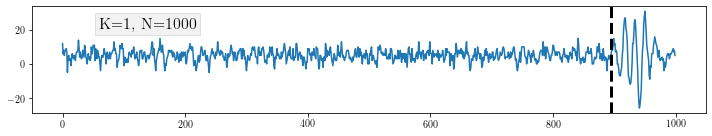

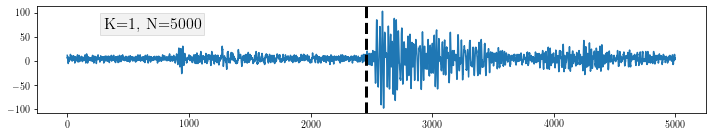

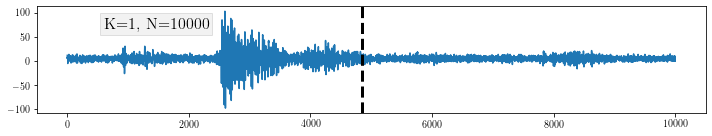

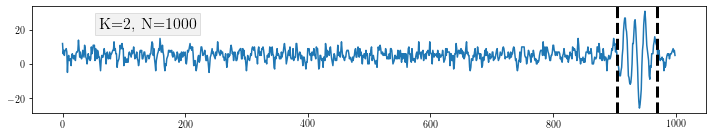

In [0]:
%%time
ind = [1000, 5000, 10000]
k = [1, 2, 3]
for kk in k :

    for xx in ind :

        ac_dat = array(eq1.acoustic_data[:xx])
        algo1 = rpt.Dynp(model="rbf").fit(ac_dat)
        result = algo1.predict(n_bkps=kk)

        # display
        fig, axs = rpt.display(eq1.acoustic_data.values[:xx], [], result);
        axs[0].text(0.1, 0.8, 'K=%s, N=%s' %(kk, xx), transform=axs[0].transAxes, 
                    fontsize=16, bbox=dict(facecolor='gray', alpha=0.1))
        plt.show()

caption

Find a method that has computational complexity O(Nlog(N))

Run both methods on the full 10000 rows dataset with the goal is to isolate 3 chunks of the time series. Read about the methods you choose, and describe the constraints you imposed and the paraemters you choose.

**ruptures.detection.Binseg** has computational complexity of O($n~log(n)$), where **n** the number of samples.
It takes.

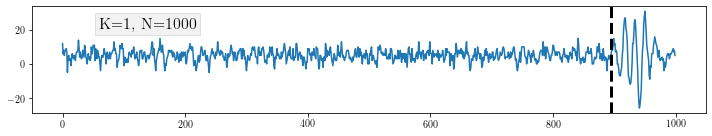

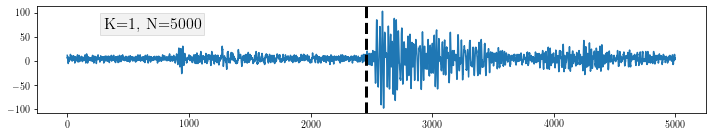

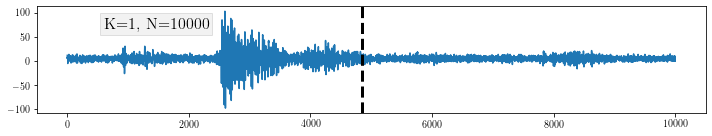

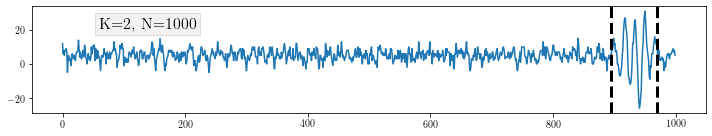

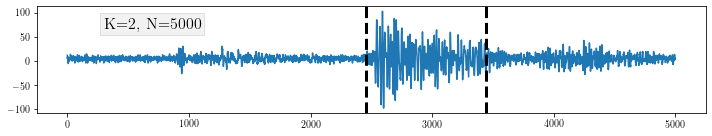

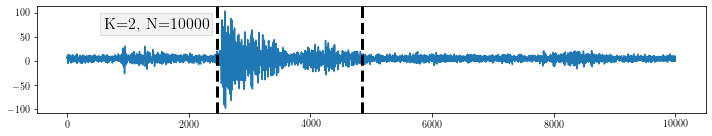

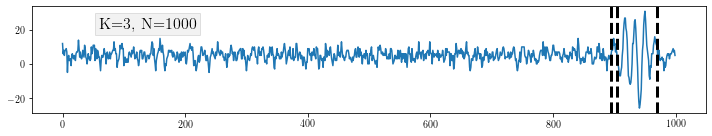

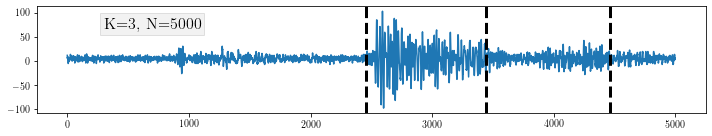

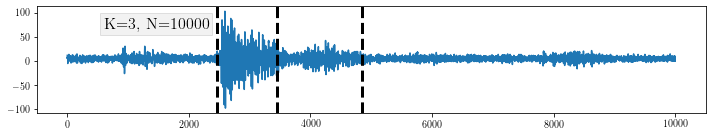

CPU times: user 12min 3s, sys: 6.1 s, total: 12min 9s
Wall time: 12min 9s


In [37]:
%%time
ind = [1000, 5000, 10000]
k = [1, 2, 3]
for kk in k :

    for xx in ind :

        ac_dat = array(eq1.acoustic_data[:xx])
        algo1 = rpt.Binseg(model="rbf").fit(ac_dat)
        result = algo1.predict(n_bkps=kk)

        # display
        fig, axs = rpt.display(eq1.acoustic_data.values[:xx],[] , result);
        axs[0].text(0.1, 0.8, 'K=%s, N=%s' %(kk, xx), transform=axs[0].transAxes, 
                    fontsize=16, bbox=dict(facecolor='gray', alpha=0.1))
        plt.show( )

caption (note that your plot does not need to look exactly like mine